## GloBox New Banner A/B Test Analysis

Here we aim to analyze the results of the A/B test that compares two versions of the website (with/without the banner) to determine which one is better to increase revenue and conversion. By applying inferential statistics techniques, we can conclude the analysis results with precision. And to provide recommendation to GloBox management on whether to launch the new feature.   

In [46]:
#load libraries

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [12]:
#load records from the database extracts 

df = pd.read_csv('/Users/cftsang/Documents/py-code/sprint2-data.csv')

In [13]:
#data sampling

df.sample(5)

,uid,group,total_spent
35893,1036675,A,0.0
28766,1029372,B,0.0
46781,1047801,B,0.0
39459,1040326,A,0.0
38712,1039554,B,0.0


In [14]:
#basic statistics

df.groupby('group')['total_spent'].agg(['mean', 'std', 'count'])

,mean,std,count
group,,,
A,3.374518,25.936391,24343
B,3.390867,25.414110,24600


### A/B Testing

### Revenue
What is the 95% of confidence interval for the difference in the average revenue per user between the test and the control (test - control)?

The Null Hypopthesis is that the mean revenue for the control is the same as the mean revenue for the test.

**H0:** mean(test) == mean(control)<br>
**H1:** mean(test) != mean(control)

We are testing whether the experiment is successful.

In [15]:
#group_a -> this control group does not see the food banner. group_b -> this test group sees the food banner

group_a = df[df.group == 'A']['total_spent']
group_b = df[df.group == 'B']['total_spent']

#critical value for the 95% confidence level
crit=1.96

#find mean difference
mean_a=group_a.agg(['mean'])
mean_b=group_b.agg(['mean'])
mean_diff = mean_b - mean_a

#calculate confidence interval
std_a = np.std(group_a)
std_b = np.std(group_b)
se = np.sqrt((std_a**2/group_a.count())+(std_b**2/group_b.count()))
print(mean_diff - crit*se, mean_diff + crit*se)

#calculate p-value
ttest_ind(group_b, group_a)

mean   -0.438638
Name: total_spent, dtype: float64 mean    0.471335
Name: total_spent, dtype: float64


Ttest_indResult(statistic=0.07043243220818624, pvalue=0.9438497659410893)

**Summary:**
- 95% confidence intervals (-0.438638, 0.471335).
- As p-value 0.944 > alpha 0.05, it is not statistically significant. We failed to reject the null hypothesis H0.
- Two groups have no significant differences in revenue.

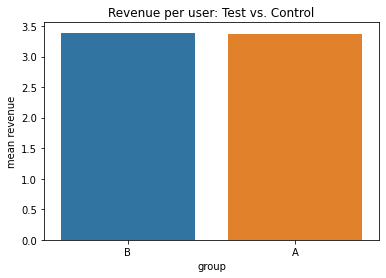

In [16]:
#plot revenue bar chart

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(y = "total_spent", x = "group", data = df, ci=None)
plt.title("Revenue per user: Test vs. Control")
plt.ylabel("mean revenue")
plt.show()

### Conversion

Is there any difference in the conversion proportion between the test and the control? (significant level 0.05)

The Null Hypopthesis is that the conversion proportion for the control (Pa) is the same as the conversion proportion for the test (Pb).

**H0 (Null hypothesis)** : Pa = Pb 

**Ha (Alternative hypothesis)**: Pa != Pb

In [60]:
from scipy.stats import norm

#conversion size A & conversion size B
cva=df[(df.group=='A') & (df.total_spent > 0)]['uid'].count()
cvb=df[(df.group=='B') & (df.total_spent > 0)]['uid'].count()
#group A size & group B size
na=group_a.count()
nb=group_b.count()

#mean
Pa_hat = cva / na
Pb_hat = cvb / nb

#compute pooled sample proportion
P_hat = (cva + cvb)/(na + nb)

#compute test statistic Z
Z = (Pa_hat - Pb_hat) / np.sqrt((P_hat*(1-P_hat)) * (1/na + 1/nb))

#compute p-value for Z
pv=2*(1-norm.cdf(abs(Z)))
print(pv)

0.00011141198532937935


**Summary:**
- The P-value is 0.00011, it is statistically significant. 
- Because p-value <= alpha 0.05, we reject the null hypothesis. Again, there is sufficient evidence at the 0.05 level to conclude that the two populations differ with respect to their conversion proportions.

/Users/cftsang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/cftsang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


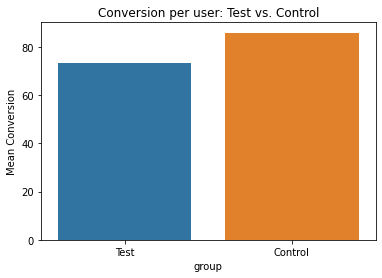

In [10]:
#plot conversion bar chart

import matplotlib.pyplot as plt
import seaborn as sns

cv=df[df.total_spent > 0]
# Applying the condition
cv.loc[cv["group"] == "A", "group"] = "Control"
cv.loc[cv["group"] == "B", "group"] = "Test"

cv.rename(columns = {'total_spent':'convt_num'}, inplace = True)
sns.barplot(y = "convt_num", x = "group", data = cv, ci=None)

plt.title("Conversion per user: Test vs. Control")
plt.ylabel("Mean Conversion")
plt.show()